In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#import pandas as pd
#import focal

import sys
import os
# Add the root folder to Python path
root_folder = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_folder not in sys.path:
    sys.path.append(root_folder)


from lib.focal import FocalH


# Simple script to inspect converted files

## Single event

[ 375.  831.  638.  610.  649.  447. 1151. 1336. 1110. 1520.  554.  716.
 2305. 1700. 1504.  788.  957. 1172. 1220. 1256. 1213. 1761. 1256. 1780.
 1065. 1599. 3580. 1105. 1206.  715. 4436. 4432. 4275. 3424.  721. 4411.
 4789. 4421. 1783.  668. 2885. 4008. 2961. 1730. 1123. 1518. 1537. 1405.
 1643. 1004.  462.  384.  279.  217.  208.  867.  881.  133.  338.  253.
  925.  495.  370.  444.  476. 1294.  892.  422.  637.  384. 2882. 3300.
 1299.  738.  637. 2863. 4283. 4308. 4675. 1898. 2329. 4336. 4342. 4564.
 1361. 1400. 2340. 2157. 2066. 1012. 1480. 1201.  764. 1071.  900.  642.
  515.  654.  711.  493.  633.  432.  371.  466.  815.  868.  679.  839.
  400.  334.  383.  951.  770.  877.  504.  499.  290.  345.  527.  960.
 1339.  384.  318.  452.  427.  519.  756. 1063.  414.  403.  222.  389.
  566.  525.  906.  244.  360.  439.  512.  638.  600.  835.  191.  219.
  383.  582. 1097. 3850. 1455. 5435. 4819. 3225. 1167.  571. 2500. 3783.
 2405. 2337. 2866. 1919. 3093. 3932. 4703. 4689. 29

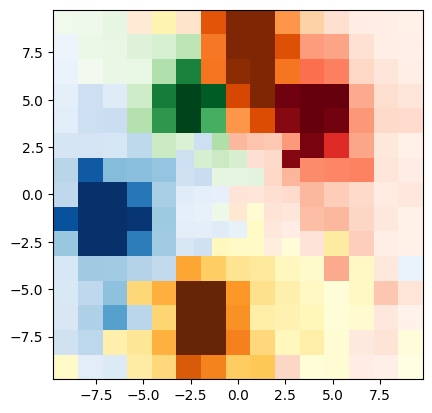

In [6]:
#filename = "/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E350_P1_N100.root"
#filename = "/home/bjartur/workspace/python_focalh_clustering/data/E150_P2_N100.root"
#filename = "/home/bjartur/workspace/focalh_data_transformer/data/converted/TRAIN_E350_N5600_GEN.root"

#filename = "/home/bjartur/workspace/python_focalh_clustering/data/train/TRAIN_E350_P1_N100.root"
filename = "/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E350_P5_N100.root"

def plot_single(filename, event=0, ax=None):
    if ax is None:
        fig,ax = plt.subplots(figsize=(10,10))
        
    tfile = ROOT.TFile(filename, "READ")
    ttree = tfile.Get("EventsTree")
    foc = FocalH()

    ttree.GetEntry(event)
    energy = np.array(ttree.energies, dtype=np.float32)
    labels = np.array(ttree.labels, dtype=np.float32)

    foc.heatmap_labels(ttree, event, ax)
    tfile.Close()

fig,ax = plt.subplots()
plot_single(filename, 61, ax)
#fig.savefig("single_particle_example.png", bbox_inches="tight")

#plot_single(filename, 1)

In [34]:
tfile = ROOT.TFile("/home/bjartur/workspace/focalh_data_transformer/data/converted/TRAIN_E350_N5600_GEN.root", "READ")
ttree = tfile.Get("EventsTree")
ttree.GetEntry(2)
npvals = np.array(ttree.value)
npvals.max()

np.float64(4095.0)

## Many events

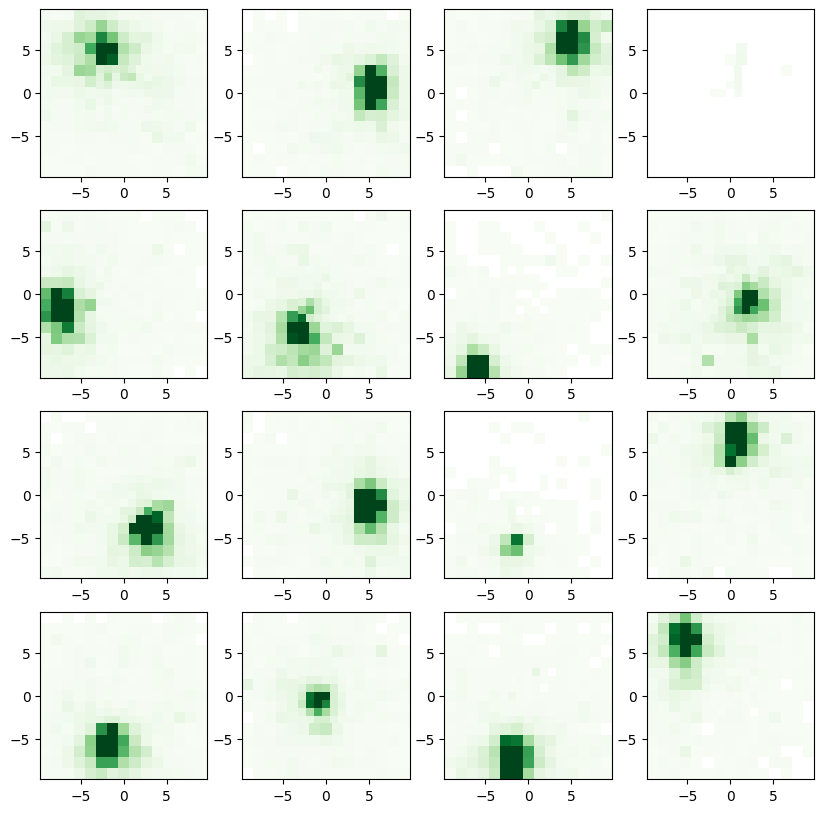

In [3]:
def plot_many(filename):
    tfile = ROOT.TFile(filename, "READ")
    ttree = tfile.Get("EventsTree")
    foc = focal.FocalH()

    rows=4
    cols=4
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10,10))
    ax = ax.flatten()

    for i in range(rows*cols):
        ttree.GetEntry(i)
        foc.heatmap(ttree, i, ax[i])
    tfile.Close()


filename = "/home/bjartur/workspace/focalh_data_transformer/data/converted/E300_P1_N1000.root"
#file = ROOT.TFile("/home/bjartur/workspace/focalh_data_transformer/data/converted/E300_P2_N1000.root", "READ")
plot_many(filename)